## Python statistics essential training - 05_03_fitgoodness

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

In [8]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

Setting up model plot

In [9]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Three models from last video

In [10]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [11]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

In [12]:
surviving_byregion_population = smf.ols(
    formula='babies_per_woman ~ -1 + region + age5_surviving'
            '+ age5_surviving:region - age5_surviving + population',
    data=gdata).fit()

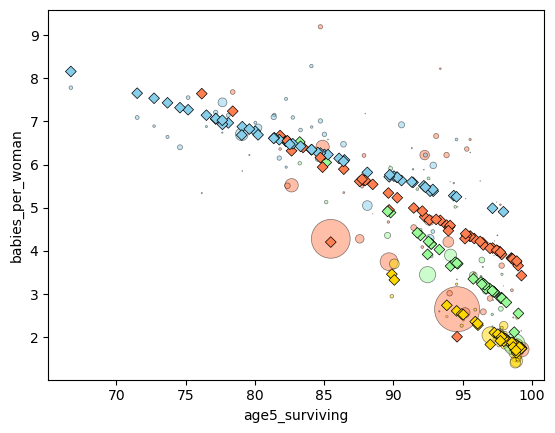

In [13]:
plotfit(surviving_byregion_population)

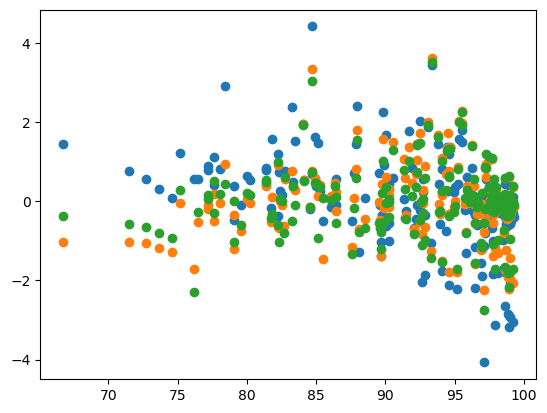

In [15]:
pp.scatter(gdata.age5_surviving, groupmeans.resid)
pp.scatter(gdata.age5_surviving, surviving.resid)
pp.scatter(gdata.age5_surviving, surviving_byregion_population.resid)

In [19]:
# Look at Mean Squared Error (MSE) first
for model in [groupmeans, surviving, surviving_byregion_population]: print(model.mse_resid)

1.4979520263709156
0.9423025333008324
0.8480227300570343
